<a href="https://colab.research.google.com/github/bigirimanainnocent12/Apprentissage_automatique/blob/main/Apprentissage_Automatique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **projet: Cours apprentissage automatique**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings # Ignorer tous les avertissements
warnings.filterwarnings("ignore") # Ignorer les avertissements spécifiques
warnings.filterwarnings("ignore", category=DeprecationWarning)

# ***1. Chargement et préparation de données réelles***


In [3]:
import kagglehub
import pandas as pd
import os

# Télécharger la dernière version
chemin = kagglehub.dataset_download("thehapyone/uci-online-news-popularity-data-set")

print("Path to dataset files:", chemin)

# Trouver le fichier CSV dans le répertoire téléchargé
for filename in os.listdir(chemin):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(chemin, filename)
        break  # Arrêter après avoir trouvé le premier fichier CSV

# Lire le fichier CSV
DF = pd.read_csv(csv_file_path)
DF.head()


Path to dataset files: /root/.cache/kagglehub/datasets/thehapyone/uci-online-news-popularity-data-set/versions/1


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# ***Déscription de la base de données***

La base de données synthétise une variété de caractéristiques concernant les articles diffusés par Mashable sur une durée de deux ans environ. cet ensemble comprend 61 variables:

1. url : URL de l'article
2. timedelta : Jours entre la publication de l'article et l'acquisition du jeu de données

3. n_tokens_title : Nombre de mots dans le titre (Quantitative)
4. n_tokens_content : Nombre de mots dans le contenu (Quantitative)
5. n_unique_tokens : Taux de mots uniques dans le contenu (Quantitative)
6. n_non_stop_words : Taux de mots non-stop dans le contenu (Quantitative)
7. n_non_stop_unique_tokens : Taux de mots uniques non-stop dans le contenu (Quantitative)
8. num_hrefs : Nombre de liens (Quantitative)
9. num_self_hrefs : Nombre de liens vers d'autres articles publiés par Mashable (Quantitative)
10. num_imgs : Nombre d'images (Quantitative)
11. num_videos : Nombre de vidéos (Quantitative)
12. average_token_length : Longueur moyenne des mots dans le contenu (Quantitative)
13. num_keywords : Nombre de mots-clés dans les métadonnées (Quantitative)
14. data_channel_is_lifestyle : Le canal de données est-il  Lifestyle ? (Binaire)
15. data_channel_is_entertainment : le canal de données est-il  Divertissement? (Binaire)
16. data_channel_is_bus : Le canal de données est-il professionnel  ? (Binaire)
17. data_channel_is_socmed : Le canal de données est-il un  réseau social? (Binaire)
18. data_channel_is_tech : Le canal de données est-il  Tech ? (Binaire)
19. data_channel_is_world : Le canal de données est-il World ? (Binaire)
20. kw_min_min : pire mot-clé (partages min.) (Quantitative)
21. kw_max_min : pire mot-clé (partages max.) (Quantitative)
22. kw_avg_min : pire mot-clé (partages moyens) (Quantitative)
23. kw_min_max : Meilleur mot-clé (min. de partages) (Quantitative)
24. kw_max_max : Meilleur mot-clé (partages max.) (Quantitative)
25. kw_avg_max : Meilleur mot-clé (partages moyens) (Quantitative)
26. kw_min_avg : mot-clé moyen (partages min.) (Quantitative)
27. kw_max_avg : mot-clé moyen (partages max.) (Quantitative)
28. kw_avg_avg : mot-clé moyen (partages moyens) (Quantitative)
29. self_reference_min_shares : nombre minimum de parts d'articles référencés dans Mashable (Quantitative)
30. self_reference_max_shares : nombre maximal de parts d'articles référencés dans Mashable (Quantitative)
31. self_reference_avg_sharess : Moyenne des parts d'articles référencés .dans Mashable (Quantitative)
32. weekday_is_monday : L’article a-t-il été publié un lundi ? (Binaire)
33. weekday_is_tuesday : L'article a-t-il été publié un mardi ? (Binaire)
34. weekday_is_wednesday : L'article a-t-il été publié un mercredi ? (Binaire)
35. weekday_is_thursday : L'article a-t-il été publié un jeudi ? (Binaire)
36. weekday_is_friday : L'article a-t-il été publié un vendredi ? (Binaire)
37. weekday_is_saturday : L'article a-t-il été publié un samedi ? (Binaire)
38. weekday_is_sunday : L'article a-t-il été publié un dimanche ? (Binaire)
39. is_weekend : L'article a-t-il été publié le week-end ? (Binaire)
40. LDA_00 : Proximité avec le sujet LDA 0 (Quantitative)
41. LDA_01 : Proximité avec le thème LDA 1 (Quantitative)
42. LDA_02 : Proximité avec le thème LDA 2 (Quantitative)
43. LDA_03 : Proximité avec le thème 3 de LDA (Quantitative)
44. LDA_04 : Proximité avec le thème LDA 4 (Quantitative)
45. global_subjectivity : subjectivité du texte (Quantitative)
46. global_sentiment_polarity : Polarité des sentiments du texte (Quantitative)
47. global_rate_positive_words : Taux de mots positifs dans le contenu (Quantitative)
48. global_rate_negative_words : Taux de mots négatifs dans le contenu (Quantitative)
49. rate_positive_words : Taux de mots positifs parmi les jetons non neutres (Quantitative)
50. rate_negative_words : Taux de mots négatifs parmi les jetons non neutres (Quantitative)
51. avg_positive_polarity : Polarité moyenne des mots positifs. (Quantitative)
52. min_positive_polarity : Polarité minimale des mots positifs (Quantitative)
53. max_positive_polarity : Polarité max. des mots positifs (Quantitative)
54. avg_negative_polarity : Polarité moyenne des mots négatifs (Quantitative)
55. min_negative_polarity : Polarité minimale des mots négatifs (Quantitative)
56. max_negative_polarity : Polarité max. des mots négatifs (Quantitative)
57. title_subjectivity : Subjectivité du titre (Quantitative)
58. title_sentiment_polarity : Polarité du titre (Quantitative)
59. abs_title_subjectivity : Niveau de subjectivité absolue (Quantitative)
60. abs_title_sentiment_polarity : Niveau de polarité absolu (Quantitative)
61. actions : Nombre d'actions (cible) (Quantitative la réponse)


# Remarque

Nous allons suprimer les variables url et timedelta car ils n'apportent aucune information sur la variable cible "partage".

In [4]:
Df=DF.drop(["url"," timedelta"],axis=1)

Détails des informations de la base de données:


In [4]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 39644 non-null  float64
 1    n_tokens_content               39644 non-null  float64
 2    n_unique_tokens                39644 non-null  float64
 3    n_non_stop_words               39644 non-null  float64
 4    n_non_stop_unique_tokens       39644 non-null  float64
 5    num_hrefs                      39644 non-null  float64
 6    num_self_hrefs                 39644 non-null  float64
 7    num_imgs                       39644 non-null  float64
 8    num_videos                     39644 non-null  float64
 9    average_token_length           39644 non-null  float64
 10   num_keywords                   39644 non-null  float64
 11   data_channel_is_lifestyle      39644 non-null  float64
 12   data_channel_is_entertainment  

# **Remarque**

Premièrement, on va changer le type des variables binaires car dans la base de données, elles sont de type "float64".

In [5]:
variables_qualitative=Df[[' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',' weekday_is_friday',' weekday_is_saturday',' weekday_is_sunday',
                        ' is_weekend',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',
                         ' data_channel_is_world',' data_channel_is_lifestyle' ]].astype('bool')

variables_dicretes=Df[[' n_tokens_title',' n_tokens_content',' num_hrefs',' num_self_hrefs',' num_imgs',' num_videos',' num_keywords']].astype('int64')

variables_quantitative = Df[Df.columns.difference(variables_qualitative.columns.union(variables_dicretes.columns))]

data=pd.concat([variables_quantitative,variables_qualitative,variables_dicretes],axis=1)

# **Vérifications des Valeurs manquantées**

Nous remarquons que dans notre base de données, il n'y a pas des données manquantées.

In [6]:
data.isna().sum()

,0
LDA_00,0
LDA_01,0
LDA_02,0
LDA_03,0
LDA_04,0
abs_title_sentiment_polarity,0
abs_title_subjectivity,0
average_token_length,0
avg_negative_polarity,0
avg_positive_polarity,0


# **Vérifications des Valeurs dupliquées**

Nous remarquons également que dans la base de données, il n'y a pas des articles dupliqués

In [7]:
data.duplicated().sum()

0

# **La variable cible et ses liens avec les variables explicatives considérées une à une.**

# Statistiques descriptives pour la variable cible

D'après les résultats ci dessous;

- Il y a 39 644 valeurs dans la colonne shares. Cela signifie qu'il n'y a pas de valeurs manquantes dans cette variable.
- La moyenne est de 3 395.38. Cela indique que, en moyenne, les articles reçoivent environ 3 395 partages. Cependant, cette moyenne peut être influencée par des valeurs extrêmes (comme la valeur maximale de 843 300).
- L'écart type est de 11 626.95, ce qui est très élevé. Cela reflète une grande dispersion des données autour de la moyenne. En d'autres termes, les articles ont des nombres de partages très variables, certains étant très populaires (avec des partages très élevés) et d'autres beaucoup moins.
- Minimum : La plus petite valeur est 1, ce qui signifie qu'au moins un article a reçu un seul partage.
- Maximum : La plus grande valeur est 843 300, ce qui indique qu'un article a été extrêmement populaire. Cette valeur est très éloignée de la moyenne, ce qui pourrait suggérer un outlier (valeur aberrante).
- Percentiles (25%, 50%, 75%):

* 25% (premier quartile) : 25 % des articles ont 946 partages ou moins.

* 50% (médiane) : La moitié des articles ont 1 400 partages ou moins. Cela suggère que la répartition est asymétrique (car la médiane est bien inférieure à la moyenne).
* 75% (troisième quartile) : 75 % des articles ont 2 800 partages ou moins.

La différence entre le 75e percentile (2 800) et la moyenne (3 395.38) indique que la moyenne est tirée vers le haut par des valeurs très élevées (comme la valeur maximale de 843 300).

# Remarque

La distribution des partages est asymétrique à droite, ce qui signifie qu'une petite proportion d'articles obtient un nombre de partages exceptionnellement élevé, tandis que la majorité reçoit moins de partages.

Il y a une grande variabilité dans les données (écart type élevé).
La médiane (1 400) étant bien inférieure à la moyenne (3 395.38), il est probable que les données contiennent plusieurs outliers ou articles très populaires qui tirent la moyenne vers le haut.

In [8]:
data[" shares"].describe()

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


# ***Les liens entre la variable cible et ses variables explicatives considérées une à une***

Pour montrer une relation linéaire entre deux variables quantitatives, nous allons utiliser le coefficient de correlation de pearson.


# Corrélation entre la variable réponse et ses variables explicatives quantitatives

D'après la figure ci-desous, nous remarquons que:

- Variables importantes : Les variables avec les plus fortes corrélations positives (par exemple, kw_avg_avg, kw_max_avg) devraient être étudiées de près, car elles sont les meilleurs prédicteurs linéaires de shares.

- Corrélation globale faible : Les faibles coefficients de corrélation suggèrent que les relations linéaires entre les variables explicatives et partage sont limitées. Des méthodes plus avancées (comme les modèles non linéaires) pourraient mieux capturer les relations complexes.

- Impact négatif : Les variables avec des corrélations négatives significatives (par exemple, LDA_02, data_channel_is_world) pourraient refléter des caractéristiques qui rendent un article moins populaire.

In [6]:
import plotly.express as pe

fig = pe.bar(
    x=pd.concat([variables_quantitative,variables_dicretes],axis=1).corr()[" shares"].sort_values(ascending=False)[1:].index,
    y=pd.concat([variables_quantitative,variables_dicretes],axis=1).corr()[" shares"].sort_values(ascending=False)[1:],
    title="Corrélation entre la variable réponse et ses variables explicatives quantitatives"
)

fig.update_layout(
    xaxis_tickangle=90,
    yaxis_title="Coefficient de corrélation"
)


fig.show()


# Test : Coefficient de corrélation de Pearson

Pour savoir si ces coefficients de corélation sont statistique différent de zero, nous allons formuler les hypothéses suivantes:

$H_0$: La variable explicative n'a pas d'effet significatif sur la popularité de l'article.

$H_1$: La variable explicative a une effet significatif sur la popularité de l'article.



In [10]:
!pip install pingouin
import pingouin as pg

cols_to_correlate = pd.concat([variables_quantitative, variables_dicretes], axis=1).columns


correlation_results = {}


for col in cols_to_correlate:
    result = pg.corr(data[col], data[' shares'])  # Pass individual columns
    correlation_results[col] = {
        'r': result['r'].values[0],  # Extract correlation coefficient (r)
        'p-val': result['p-val'].values[0]  # Extract p-value
    }


correlation_df = pd.DataFrame(correlation_results).T

correlation_df[correlation_df["p-val"]< 0.05].sort_values(by="r",ascending=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.9 MB/s eta 0:00:00


,r,p-val
shares,1.000000,0.000000e+00
kw_avg_avg,0.110413,9.377044e-108
LDA_03,0.083771,1.138055e-62
kw_max_avg,0.064306,1.322513e-37
self_reference_avg_sharess,0.057789,1.102271e-30
self_reference_min_shares,0.055958,7.161722e-29
self_reference_max_shares,0.047115,6.236077e-21
num_hrefs,0.045404,1.501028e-19
kw_avg_max,0.044686,5.510917e-19
kw_min_avg,0.039551,3.334784e-15


# les liens entre la variable cible et ses variables explicatives qualitatives considérées une à une

In [7]:
from  scipy import stats
cols_to_correlate = variables_qualitative.columns

test_student = {}

for col in cols_to_correlate:
    test = stats.mannwhitneyu(data[' shares'].where(data[col]==True).dropna(), data[' shares'].where(data[col]==False).dropna(),alternative='two-sided')
    test_student[col] = {
        'statistic': test.statistic,
        'p-val': test.pvalue
    }

test_resulat = pd.DataFrame(test_student).T
test_resulat[test_resulat["p-val"]< 0.05].sort_values(by="p-val",ascending=False)

,statistic,p-val
weekday_is_friday,98594318.0,2.135091e-02
data_channel_is_bus,101436810.0,2.666105e-04
weekday_is_monday,106519795.0,9.230454e-05
weekday_is_thursday,111693407.0,1.488658e-11
weekday_is_tuesday,111927705.0,2.996175e-16
data_channel_is_lifestyle,43724628.5,2.426405e-17
weekday_is_wednesday,111215764.5,9.419704e-22
data_channel_is_tech,135287066.0,5.243201e-79
weekday_is_sunday,61822427.0,1.769401e-85
weekday_is_saturday,57510294.5,3.568030e-104


# ***2. Prédiction***

Comme les variables explicatives ne sont pas corrélées de façon linéaire avec la variable réponse (voire la figure des corrélations) i.e les  coefficient de corrélations sont faibles ou quasi- nulles. nous allons effectuer la discrétisation de la variable réponse en deux catégorie. La valeur de référence est la mediane car elle n'est pas sensible aux valeurs aberrantes. L'objectif est de savoir si un article a été populaire ou pas. la nouvelle variable obtenue sera code 0 pour dire que l'article n'a pas été populaire et 1 pour dire que l'article est populaire.

In [8]:
def z(share):

  return share.apply(lambda x: '0' if x <=1400 else '1').astype("object")

data["Popularite"]= pd.DataFrame(z(data[' shares']))
data.value_counts("Popularite")

,count
Popularite,
0,20082
1,19562


# **Remarque**:

D'après le tableau obtenu, on remarque que 20082 articles n'ont pas été populaire contre 19562 articles qui ont été populaire.


La nouvelle variable est binaire, code 0 et 1. pour construire un modèle pour expliquer cette variable "populalité", nous allons utiliser les méthodes de classificationns comme les forêts aleatoire, les KNN et la regression logistique qui sont des methodes robustes pour traiter ce genre de problème.


1. Forêts aléatoires

Les forêts aléatoires (Random Forests) sont une technique d'apprentissage automatique basée sur les arbres de décision. Elles fonctionnent en créant une multitude d'arbres de décision sur divers sous-ensembles du jeu de données et en utilisant la moyenne des prédictions de chaque arbre pour obtenir une meilleure précision. Les forêts aléatoires sont particulièrement utiles pour la classification et la régression et sont robustes face au surapprentissage (overfitting).
- Avantages:
1. Les forêts aléatoires réduisent le risque de surapprentissage par rapport aux arbres de décision individuels en agrégeant les prédictions de plusieurs arbres.
2. Les forêts aléatoires répondent aux contraintes des arbres de décision en réduisant la sensibilité au bruit en combinant plusieurs arbres, ce qui stabilise les prédictions.

-  inconvénients:


2. K-Nearest Neighbors (KNN)

Le KNN est un algorithme d'apprentissage supervisé utilisé à la fois pour la classification et la régression. Il fonctionne en trouvant les K exemples les plus proches (voisins) dans le jeu de données pour effectuer une prédiction pour un nouvel exemple. La proximité est mesurée à l'aide d'une distance, comme la distance euclidienne. KNN est simple à comprendre et à mettre en œuvre, mais peut être lent avec de grands jeux de données.

- Avantages:




-  inconvénients:

3. Régression logistique

La régression logistique est une méthode statistique pour la classification binaire, bien qu'elle puisse être étendue à des cas multiclasse. Elle modélise la probabilité qu'un exemple appartienne à une certaine classe en utilisant une fonction logistique. Contrairement à la régression linéaire, qui prédit des valeurs continues, la régression logistique prédit des probabilités et applique un seuil pour assigner l'exemple à une classe particulière.

- Avantages:



-  inconvénients:

# ***Trois méthodes de prédiction vues en cours***

# **a. aucune réduction des dimensions**


In [9]:
X=data.drop([" shares","Popularite"],axis=1)
Y=data["Popularite"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# **1. RandomForestClassifie**

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, FunctionTransformer

def binary_transformer(x):
    return x.astype(int)

preprocessor = ColumnTransformer(
    transformers=[
        ('MISE A L ECHELLE', RobustScaler(), X.select_dtypes(include=['int64','float64']).columns),
        ('BINAIRE', FunctionTransformer(binary_transformer, validate=False), X.select_dtypes(include=['bool']).columns)
])
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier


model = make_pipeline(
    preprocessor,
    RandomForestClassifier()
)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'randomforestclassifier__n_estimators': [100,150,200,250]
}

grid = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('MISE '
                                                                         'A L '
                                                                         'ECHELLE',
                                                                         RobustScaler(),
                                                                         Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_r...
       ' weekday_is_sunday', ' is_weekend', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' data_channel_is_lifestyle'],
      dtype='object'))])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__n_estimators': [100, 150, 200,
                                                                  250]},
             scoring='accuracy')

# **Matrice de Confusion**

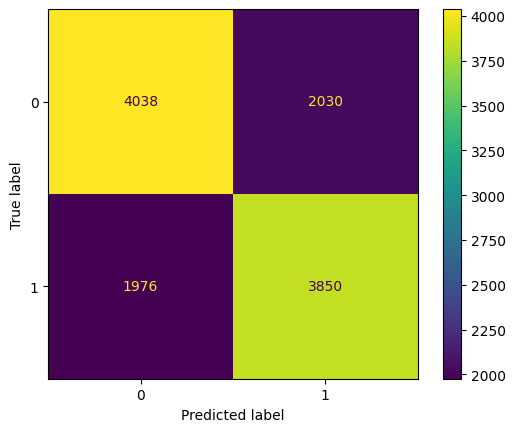

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
prediction=grid.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,prediction)).plot()

# **Interprétation des Résultats**

- Vrai Négatif (TN): Il y a 4038 instances où le modèle a correctement prédit la classe négative (0).

- Faux Positif (FP): Il y a 2030 instances où le modèle a prédit la classe positive (1), alors que l'instance était réellement de la classe négative (0).

- Faux Négatif (FN): Il y a 1976 instances où le modèle a prédit la classe négative (0), alors que l'instance était réellement de la classe positive (1).

- Vrai Positif (TP): Il y a 3850 instances où le modèle a correctement prédit la classe positive (1).

# **Rapport de classification**

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      6068
           1       0.65      0.66      0.66      5826

    accuracy                           0.66     11894
   macro avg       0.66      0.66      0.66     11894
weighted avg       0.66      0.66      0.66     11894



La précision globale du modèle est de 66%, ce qui signifie que le modèle a correctement classé 66 % de toutes les instances du jeu de test.

# **L' aire sous la courbe**

In [18]:
from sklearn.metrics import  roc_auc_score
y_score = grid.predict_proba(X_test)[:, 1]  # Select the probabilities for class '1'
print(f" L'aire sous la courbe ROC:{roc_auc_score(y_test,y_score)}. Un score de 1 signifie une séparation parfaite entre les classes")

 L'aire sous la courbe ROC:0.7271210778360184. Un score de 1 signifie une séparation parfaite entre les classes


# **2. KNeighborsClassifier**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, FunctionTransformer

def binary_transformer(x):
    return x.astype(int)

preprocessor = ColumnTransformer(
    transformers=[
        ('MISE A L ECHELLE', RobustScaler(), X.select_dtypes(include=['int64','float64']).columns),
        ('BINAIRE', FunctionTransformer(binary_transformer, validate=False), X.select_dtypes(include=['bool']).columns)
])

from sklearn.pipeline import make_pipeline

model_1 = make_pipeline(
    preprocessor,
    KNeighborsClassifier()
)

from sklearn.model_selection import GridSearchCV

param_grid_1 = {
    'kneighborsclassifier__n_neighbors': [100,150,200,250]
}

grid_1 = GridSearchCV(model_1, param_grid=param_grid_1, cv=5, scoring='accuracy')
grid_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('MISE '
                                                                         'A L '
                                                                         'ECHELLE',
                                                                         RobustScaler(),
                                                                         Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_r...
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' data_channel_is_lifestyle'],
      dtype='object'))])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [100, 150, 200,
                                                               250]},
             scoring='accuracy')

# **Matrice de confusion**

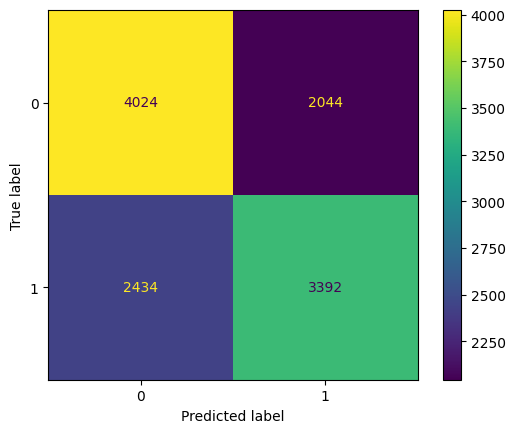

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
prediction_1=grid_1.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,prediction_1)).plot()

# **Interprétation des Résultats**

- Vrai Négatif (TN): Il y a 4024 instances où le modèle a correctement prédit la classe négative (0).

- Faux Positif (FP): Il y a 2044 instances où le modèle a prédit la classe positive (1), alors que l'instance était réellement de la classe négative (0).

- Faux Négatif (FN): Il y a 2434 instances où le modèle a prédit la classe négative (0), alors que l'instance était réellement de la classe positive (1).

- Vrai Positif (TP): Il y a 3392 instances où le modèle a correctement prédit la classe positive (1).

# **Rapport de classification**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_1))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64      6068
           1       0.62      0.58      0.60      5826

    accuracy                           0.62     11894
   macro avg       0.62      0.62      0.62     11894
weighted avg       0.62      0.62      0.62     11894



La précision globale du modèle est de 62%, ce qui signifie que le modèle a correctement classé 67 % de toutes les instances du jeu de test.

# **L' aire sous la courbe**

In [ ]:
from sklearn.metrics import  roc_auc_score
y_score = grid_1.predict_proba(X_test)[:, 1]  # Select the probabilities for class '1'
print(f" L'aire sous la courbe ROC:{roc_auc_score(y_test,y_score)}. Un score de 1 signifie une séparation parfaite entre les classes")

 L'aire sous la courbe ROC:0.6724385474746556. Un score de 1 signifie une séparation parfaite entre les classes


# **3. Régression logistique**

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, FunctionTransformer

def binary_transformer(x):
    return x.astype(int)

preprocessor = ColumnTransformer(
    transformers=[
        ('MISE A L ECHELLE', RobustScaler(), X.select_dtypes(include=['int64','float64']).columns),
        ('BINAIRE', FunctionTransformer(binary_transformer, validate=False), X.select_dtypes(include=['bool']).columns)
])

from sklearn.pipeline import make_pipeline

model_2 = make_pipeline(
    preprocessor,
    LogisticRegression()
)

from sklearn.model_selection import GridSearchCV


param_grid_2 = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__solver': ['lbfgs', 'liblinear', 'saga']

}


grid_2 = GridSearchCV(model_2, param_grid=param_grid_2, cv=5, scoring='accuracy')
grid_2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('MISE '
                                                                         'A L '
                                                                         'ECHELLE',
                                                                         RobustScaler(),
                                                                         Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_r...
       ' weekday_is_sunday', ' is_weekend', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' data_channel_is_lifestyle'],
      dtype='object'))])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.1, 1, 10, 100],
                         'logisticregression__solver': ['lbfgs', 'liblinear',
                                                        'saga']},
             scoring='accuracy')

# **Matrice de confusion**

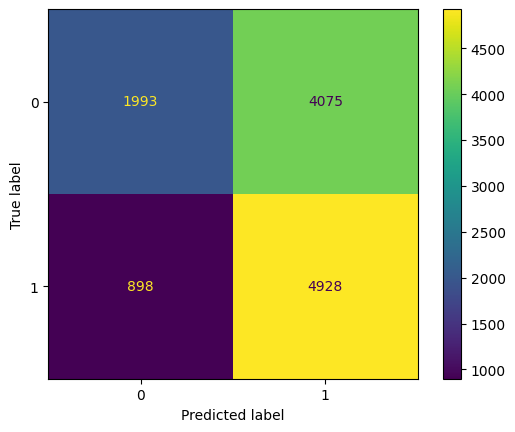

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
prediction_1grid_2=grid_2.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,prediction_1grid_2)).plot()

# **Interprétation des Résultats**

- Vrai Négatif (TN): Il y a 1993 instances où le modèle a correctement prédit la classe négative (0).

- Faux Positif (FP): Il y a 4075 instances où le modèle a prédit la classe positive (1), alors que l'instance était réellement de la classe négative (0).

- Faux Négatif (FN): Il y a 898 instances où le modèle a prédit la classe négative (0), alors que l'instance était réellement de la classe positive (1).

- Vrai Positif (TP): Il y a 4928 instances où le modèle a correctement prédit la classe positive (1).

# **Rapport de classification**

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_1))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64      6068
           1       0.62      0.58      0.60      5826

    accuracy                           0.62     11894
   macro avg       0.62      0.62      0.62     11894
weighted avg       0.62      0.62      0.62     11894



La précision globale du modèle est de 62%, ce qui signifie que le modèle a correctement classé 67 % de toutes les instances du jeu de test.

# **L' aire sous la courbe**

In [25]:
from sklearn.metrics import  roc_auc_score
y_score = grid_2.predict_proba(X_test)[:, 1]  # Select the probabilities for class '1'
print(f" L'aire sous la courbe ROC:{roc_auc_score(y_test,y_score)}. Un score de 1 signifie une séparation parfaite entre les classes")

 L'aire sous la courbe ROC:0.6051393651444517. Un score de 1 signifie une séparation parfaite entre les classes


# **Réduction par la méthode ACP**

# **RandomForestClassifier**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, FunctionTransformer

def binary_transformer(x):
    return x.astype(int)

preprocessor_PCA = ColumnTransformer(
    transformers=[
        ('MISE A L ECHELLE', RobustScaler(), X.select_dtypes(include=['int64','float64']).columns),
     ('binary', FunctionTransformer(binary_transformer, validate=False), X.select_dtypes(include=['bool']).columns),
         ('REDUCTIONS_DES_DIMENSIONS', PCA(n_components=30) , X.select_dtypes(include=['int64','float64',"bool"]).columns)

])


from sklearn.pipeline import make_pipeline

model_1_PCA = make_pipeline(
    preprocessor_PCA,
    RandomForestClassifier()
)

from sklearn.model_selection import GridSearchCV

param_grid_1_PCA = {
    'randomforestclassifier__n_estimators': [100,150,200,250]
}
grid_1_PCA= GridSearchCV(model_1_PCA, param_grid=param_grid_1_PCA, cv=5, scoring='accuracy')
grid_1_PCA.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('MISE '
                                                                         'A L '
                                                                         'ECHELLE',
                                                                         RobustScaler(),
                                                                         Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_r...
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' data_channel_is_lifestyle', ' n_tokens_title', ' n_tokens_content',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' num_keywords'],
      dtype='object'))])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__n_estimators': [100, 150, 200,
                                                                  250]},
             scoring='accuracy')

# **Matrice de confusion**

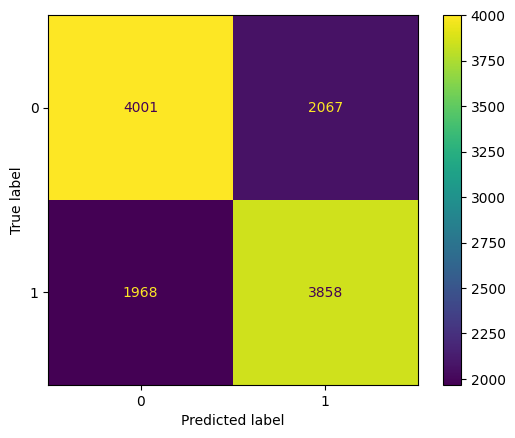

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
predictiongrid_1_PCA=grid_1_PCA.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,predictiongrid_1_PCA)).plot()

# **Interprétation des Résultats**

- Vrai Négatif (TN): Il y a 4001 instances où le modèle a correctement prédit la classe négative (0).

- Faux Positif (FP): Il y a 2067 instances où le modèle a prédit la classe positive (1), alors que l'instance était réellement de la classe négative (0).

- Faux Négatif (FN): Il y a 1968 instances où le modèle a prédit la classe négative (0), alors que l'instance était réellement de la classe positive (1).

- Vrai Positif (TP): Il y a 3858 instances où le modèle a correctement prédit la classe positive (1).

# **Rapport de classification**

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictiongrid_1_PCA))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66      6068
           1       0.65      0.66      0.66      5826

    accuracy                           0.66     11894
   macro avg       0.66      0.66      0.66     11894
weighted avg       0.66      0.66      0.66     11894



La précision globale du modèle est de 66%, ce qui signifie que le modèle a correctement classé 67 % de toutes les instances du jeu de test.

# **L' aire sous la courbe**

In [36]:
from sklearn.metrics import  roc_auc_score
y_score = grid_1_PCA.predict_proba(X_test)[:, 1]  # Select the probabilities for class '1'
print(f" L'aire sous la courbe ROC:{roc_auc_score(y_test,y_score)}. Un score de 1 signifie une séparation parfaite entre les classes")

 L'aire sous la courbe ROC:0.7246834055552124. Un score de 1 signifie une séparation parfaite entre les classes


# **KNeighborsClassifier**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, FunctionTransformer

def binary_transformer(x):
    return x.astype(int)

preprocessor_1_PCA = ColumnTransformer(
    transformers=[
        ('scaling', RobustScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('binary', FunctionTransformer(binary_transformer, validate=False), X.select_dtypes(include=['bool']).columns),
        ('Reduction', PCA(n_components=30), X.select_dtypes(include=['int64', 'float64', "bool"]).columns)
    ]
)

from sklearn.pipeline import make_pipeline

model_1_PCA = make_pipeline(
    preprocessor_1_PCA,
    KNeighborsClassifier()
)

from sklearn.model_selection import GridSearchCV

param_grid_1_PCA = {
    'kneighborsclassifier__n_neighbors': [100, 150, 200, 250]
}

grid_1_PCA = GridSearchCV(model_1_PCA, param_grid=param_grid_1_PCA, cv=5, scoring='accuracy')
grid_1_PCA.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         RobustScaler(),
                                                                         Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_rate_positi...
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' data_channel_is_lifestyle', ' n_tokens_title', ' n_tokens_content',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' num_keywords'],
      dtype='object'))])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [100, 150, 200,
                                                               250]},
             scoring='accuracy')

# **Matrice de confusion**

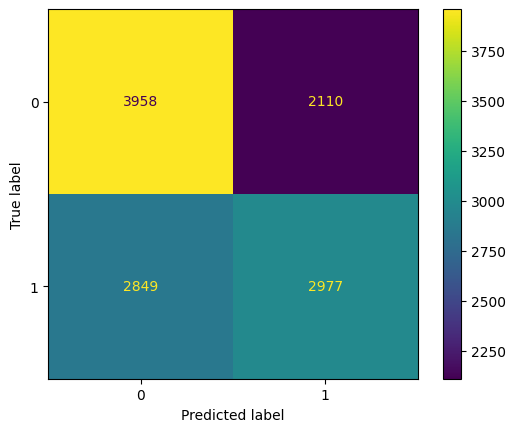

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
prediction_1_PCA1=grid_1_PCA.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,prediction_1_PCA1)).plot()

# **Rapport de classification**

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_1_PCA1))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61      6068
           1       0.59      0.51      0.55      5826

    accuracy                           0.58     11894
   macro avg       0.58      0.58      0.58     11894
weighted avg       0.58      0.58      0.58     11894



La précision globale du modèle est de 58%, ce qui signifie que le modèle a correctement classé 58 % de toutes les instances du jeu de test.

# **L' aire sous la courbe**

In [41]:
from sklearn.metrics import  roc_auc_score
y_score = grid_1_PCA.predict_proba(X_test)[:, 1]  # Select the probabilities for class '1'
print(f" L'aire sous la courbe ROC:{roc_auc_score(y_test,y_score)}. Un score de 1 signifie une séparation parfaite entre les classes")

 L'aire sous la courbe ROC:0.6182270349020743. Un score de 1 signifie une séparation parfaite entre les classes


# **Régression Logistique**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.decomposition import PCA

def binary_transformer(x):
    return x.astype(int)

preprocessor_2_PCA = ColumnTransformer(
    transformers=[
        ('scaling', RobustScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('binary', FunctionTransformer(binary_transformer, validate=False), X.select_dtypes(include=['bool']).columns),
        ('Reduction', PCA(n_components=30), X.select_dtypes(include=['int64', 'float64', "bool"]).columns)
    ]
)

from sklearn.pipeline import make_pipeline

model_2_PCA = make_pipeline(
    preprocessor_2_PCA,
    LogisticRegression()
)

from sklearn.model_selection import GridSearchCV



param_grid_2_PCA = {
    'logisticregression__C': [1, 6],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga']
}


grid_2_PCA = GridSearchCV(model_2_PCA, param_grid=param_grid_2_PCA, cv=5, scoring='accuracy')
grid_2_PCA.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         RobustScaler(),
                                                                         Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_rate_positi...
       ' data_channel_is_lifestyle', ' n_tokens_title', ' n_tokens_content',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' num_keywords'],
      dtype='object'))])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [1, 6],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'saga']},
             scoring='accuracy')

# **Matrice de confusion**

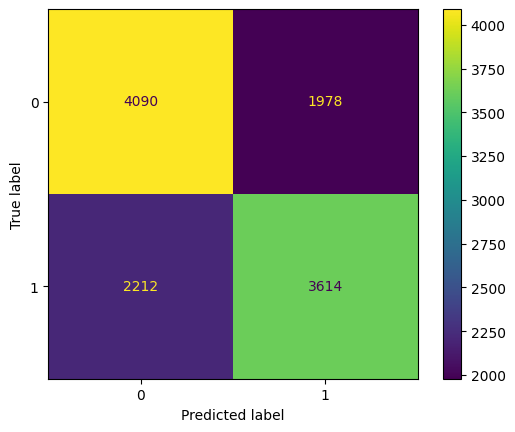

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
prediction_grid_2_PCA=grid_2_PCA.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,prediction_grid_2_PCA)).plot()

# **Rapport de classification**

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_1_PCA1))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61      6068
           1       0.59      0.51      0.55      5826

    accuracy                           0.58     11894
   macro avg       0.58      0.58      0.58     11894
weighted avg       0.58      0.58      0.58     11894



La précision globale du modèle est de 58%, ce qui signifie que le modèle a correctement classé 58 % de toutes les instances du jeu de test.

# **L' aire sous la courbe**

In [49]:
from sklearn.metrics import  roc_auc_score
y_score = grid_2_PCA.predict_proba(X_test)[:, 1]  # Select the probabilities for class '1'
print(f" L'aire sous la courbe ROC:{roc_auc_score(y_test,y_score)}. Un score de 1 signifie une séparation parfaite entre les classes")

 L'aire sous la courbe ROC:0.7005229212533727. Un score de 1 signifie une séparation parfaite entre les classes


# **Réduction UMAP**

# **RandomForestClassifier**

In [14]:
from sklearn.model_selection import train_test_split
import umap
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, FunctionTransformer

def binary_transformer(x):
    return x.astype(int)

preprocessor_UMAP = ColumnTransformer(
    transformers=[
        ('MISE A L ECHELLE', RobustScaler(), X.select_dtypes(include=['int64','float64']).columns),
     ('binary', FunctionTransformer(binary_transformer, validate=False), X.select_dtypes(include=['bool']).columns),
     ('REDUCTIONS_DES_DIMENSIONS', umap.UMAP(n_neighbors=30, min_dist=0.1,n_components=2, random_state=42) , X.select_dtypes(include=['int64','float64',"bool"]).columns)

])


from sklearn.pipeline import make_pipeline

model_1_UMAP= make_pipeline(
    preprocessor_UMAP,
    RandomForestClassifier()
)

from sklearn.model_selection import GridSearchCV

param_grid_1_UMAP = {
    'randomforestclassifier__n_estimators': [100,150,200,250]
}
grid_1_UMAP= GridSearchCV(model_1_UMAP, param_grid=param_grid_1_UMAP, cv=5, scoring='accuracy')
grid_1_UMAP.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('MISE '
                                                                         'A L '
                                                                         'ECHELLE',
                                                                         RobustScaler(),
                                                                         Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_r...
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' data_channel_is_lifestyle', ' n_tokens_title', ' n_tokens_content',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' num_keywords'],
      dtype='object'))])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__n_estimators': [100, 150, 200,
                                                                  250]},
             scoring='accuracy')

# **Matrice de confusion**

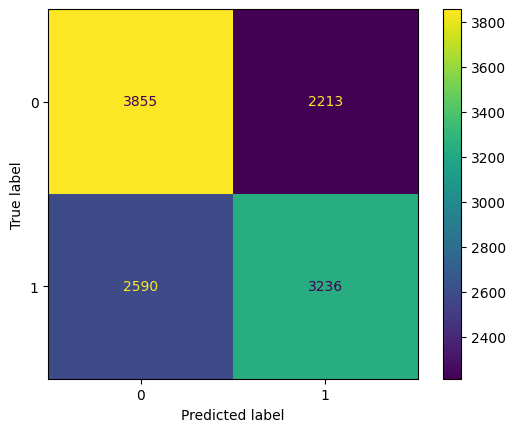

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
prediction_1_grid_1_UMAP=grid_1_UMAP.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,prediction_1_grid_1_UMAP)).plot()

# **Rapport de classification**

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_1_grid_1_UMAP))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62      6068
           1       0.59      0.56      0.57      5826

    accuracy                           0.60     11894
   macro avg       0.60      0.60      0.60     11894
weighted avg       0.60      0.60      0.60     11894



# **KNeighborsClassifier**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, FunctionTransformer

def binary_transformer(x):
    return x.astype(int)

preprocessor_UMAP = ColumnTransformer(
    transformers=[
        ('scaling', RobustScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('binary', FunctionTransformer(binary_transformer, validate=False), X.select_dtypes(include=['bool']).columns),
        ('REDUCTIONS_DES_DIMENSIONS', umap.UMAP(n_neighbors=30, min_dist=0.1,n_components=2, random_state=42) , X.select_dtypes(include=['int64','float64',"bool"]).columns)

    ]
)

from sklearn.pipeline import make_pipeline

model_1UMAP = make_pipeline(
    preprocessor_UMAP,
    KNeighborsClassifier()
)

from sklearn.model_selection import GridSearchCV

param_gridUMAP = {
    'kneighborsclassifier__n_neighbors': [100, 150, 200, 250]
}

grid_UMAP = GridSearchCV(model_1UMAP, param_grid=param_gridUMAP, cv=5, scoring='accuracy')
grid_UMAP.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         RobustScaler(),
                                                                         Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_rate_positi...
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' data_channel_is_lifestyle', ' n_tokens_title', ' n_tokens_content',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' num_keywords'],
      dtype='object'))])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [100, 150, 200,
                                                               250]},
             scoring='accuracy')

# **Matrice de confusion**

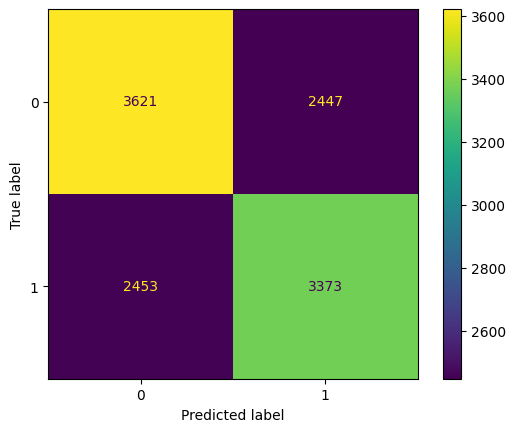

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
prediction_1_gri=grid_UMAP.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,prediction_1_gri)).plot()

# **Rapport de classification**

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_1_gri))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60      6068
           1       0.58      0.58      0.58      5826

    accuracy                           0.59     11894
   macro avg       0.59      0.59      0.59     11894
weighted avg       0.59      0.59      0.59     11894



La précision globale du modèle est de 59%, ce qui signifie que le modèle a correctement classé 59 % de toutes les instances du jeu de test.

# **Régression Logistique**

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.decomposition import PCA

def binary_transformer(x):
    return x.astype(int)

preprocessor_UMAP = ColumnTransformer(
    transformers=[
        ('scaling', RobustScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('binary', FunctionTransformer(binary_transformer, validate=False), X.select_dtypes(include=['bool']).columns),
         ('REDUCTIONS_DES_DIMENSIONS', umap.UMAP(n_neighbors=30, min_dist=0.1,n_components=2, random_state=42) , X.select_dtypes(include=['int64','float64',"bool"]).columns)
    ]
)

from sklearn.pipeline import make_pipeline

model_UMAP = make_pipeline(
    preprocessor_UMAP ,
    LogisticRegression()
)

from sklearn.model_selection import GridSearchCV



param_grid_UMAP = {
    'logisticregression__C': [1, 6],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga']
}


grid_2UMAP = GridSearchCV(model_UMAP, param_grid=param_grid_UMAP, cv=5, scoring='accuracy')
grid_2UMAP.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         RobustScaler(),
                                                                         Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' abs_title_subjectivity',
       ' average_token_length', ' avg_negative_polarity',
       ' avg_positive_polarity', ' global_rate_negative_words',
       ' global_rate_positi...
       ' data_channel_is_lifestyle', ' n_tokens_title', ' n_tokens_content',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' num_keywords'],
      dtype='object'))])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [1, 6],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'saga']},
             scoring='accuracy')

# **Matrice de confusion**

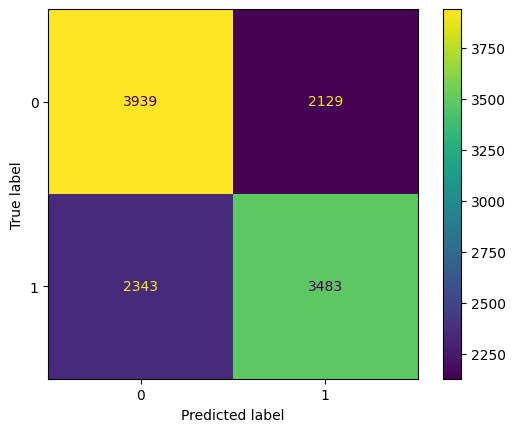

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
prediction_1_gr=grid_2UMAP.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,prediction_1_gr)).plot()

# **Rapport de classification**

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction_1_gri))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60      6068
           1       0.58      0.58      0.58      5826

    accuracy                           0.59     11894
   macro avg       0.59      0.59      0.59     11894
weighted avg       0.59      0.59      0.59     11894



# **Evaluer ses performances, en général et en fonction de la valeur réelle de la variable cible**

In [52]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00
